<h1 align="center"><strong>Streaming Viewing Analysis</strong></h1>

<h2><strong>1. Read the Data In</strong></h2>

This is where I import any needed Python libraries and all datasets I'll use in this notebook.

In [962]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [963]:
# Setup the theme
PALETTE = 'magma'
sns.set_theme(style="darkgrid")
plt.rcParams["font.family"] = "monospace"

*<h3><strong>Note about the datasets:</strong></h3>*
*Since I used four different datasets, I decided to clean each dataset in their own Jupyter Notebook and store each dataframe as a variable to use in this notebook.*

*<strong>Individual Dataset Notebooks</strong>*
   > [Hulu](hulu.ipynb)
   > [Imdb](imdb.ipynb)
   > [Netflix](netflix.ipynb)
   > [Prime Video](prime_video.ipynb)

In [964]:
# Add stored dataframes from other notebooks
%store -r hulu_cleaned
%store -r netflix_cleaned
%store -r prime_video_cleaned
%store -r imdb_cleaned

### **Combine the three streaming services: Hulu, Netflix, Prime Video into one dataframe**

In [965]:
# Combine Hulu, Netflix, and Prime_Video dataframes
streaming_list = [hulu_cleaned, netflix_cleaned, prime_video_cleaned]
streaming_combined = pd.concat(streaming_list)

# View the first five rows of the new combined dataframe
streaming_combined.head()

,Title,Date Watched,Streaming Service
0,Only Murders in the Building,10/30/2022 22:18,Hulu
1,Only Murders in the Building,10/30/2022 21:39,Hulu
2,Only Murders in the Building,10/30/2022 21:03,Hulu
3,Only Murders in the Building,10/30/2022 5:48,Hulu
4,Only Murders in the Building,10/30/2022 5:12,Hulu


In [966]:
# Get info about the streaming_combined dataframe
streaming_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27349 entries, 0 to 1869
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              27315 non-null  object
 1   Date Watched       27289 non-null  object
 2   Streaming Service  27349 non-null  object
dtypes: object(3)
memory usage: 854.7+ KB


<h2><strong>2. Manipulate and Visualize the Data</strong></h2>

### **Q1. Which streaming service is the most watched?**
Netflix is by far my most watched streaming service.

In [967]:
# Find the most watched streaming service
top_streaming_service = streaming_combined["Streaming Service"].value_counts()

top_streaming_service

Netflix        25052
Prime Video     1870
Hulu             427
Name: Streaming Service, dtype: int64

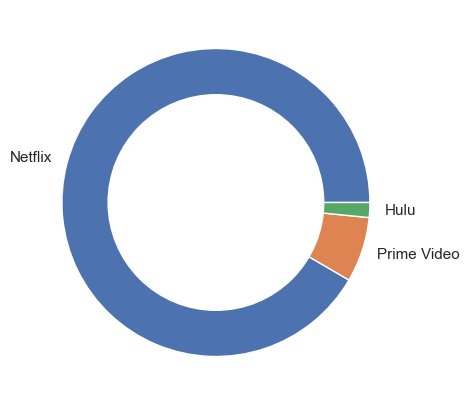

In [968]:
# Create a donut shaped Pie Chart to visualize which is the top streaming service
sns.set_style('darkgrid')
plt.figure(figsize=(20,5))
names = "Netflix", "Prime Video", "Hulu"
plt.pie(top_streaming_service, labels=names)

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

### **Q2. What are the top 5 most watched streaming titles?**
My top 5 most watched streaming titles are:
<ol>
    <li>Them Idiots! Whirled Tour</li>
    <li>Home Improvement</li>
    <li>Larry the Cable Guy: Tailgate Party</li>
    <li>Top Gear: Series 22: Episode 5</li>
    <li>White Collar: Season 1: Pilot (Episode 1)</li>
</ol>

(None of these are shows I personally watch. These belong to other family members.)

In [969]:
# View most streamed titles in combined dataframe
most_streamed_titles = streaming_combined.Title.value_counts()

most_streamed_titles.head()

Them Idiots! Whirled Tour              66
Home Improvement                       52
NullCompleteVideo                      44
Larry the Cable Guy: Tailgate Party    34
Top Gear: Series 22: Episode 5         32
Name: Title, dtype: int64

I notice that the third most watched is called "NullCompleteVideo". Since this doesn't have a proper title, I'm going to remove these entries from my dataframe.

In [970]:
# Remove any "Title" called "NullCompleteVideo"
streaming_combined = streaming_combined[streaming_combined["Title"].str.contains('NullCompleteVideo') == False]

In [971]:
# Re-running most streamed titles in streaming_combined dataframe to see if "NullCompleteVideo" has been removed
most_streamed_titles = streaming_combined.Title.value_counts().head()

most_streamed_titles

Them Idiots! Whirled Tour                    66
Home Improvement                             52
Larry the Cable Guy: Tailgate Party          34
Top Gear: Series 22: Episode 5               32
White Collar: Season 1: Pilot (Episode 1)    30
Name: Title, dtype: int64

In [972]:
# Convert back into a dataframe for visualization 
most_watched_titles = pd.DataFrame({'Title': most_streamed_titles.index, 'Counts': most_streamed_titles.values})

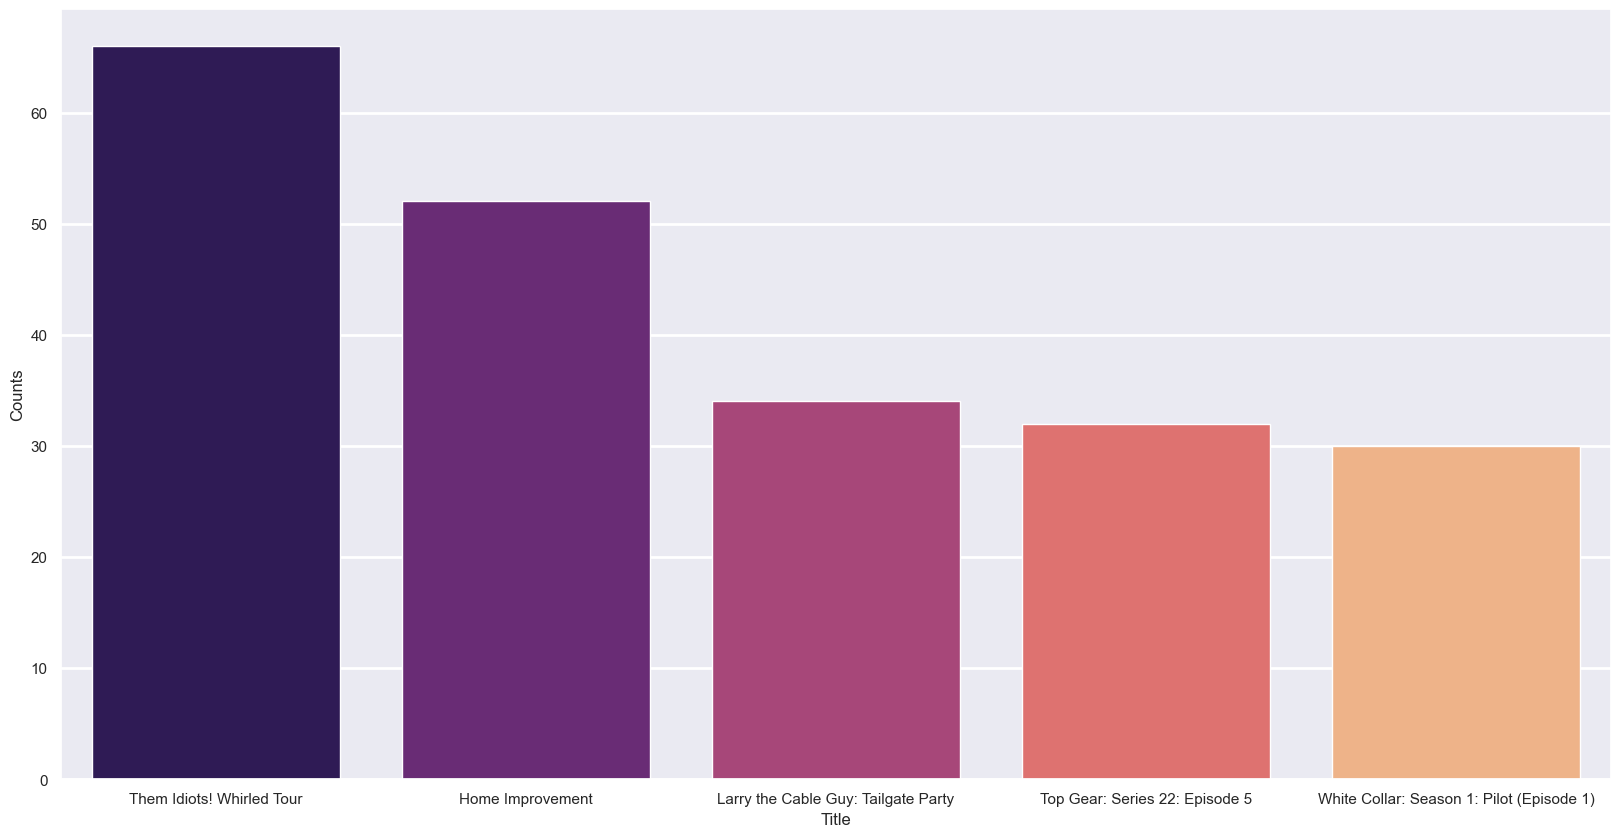

In [973]:
# Create a Seaborn Barplot showing top 5 titles watched
plt.figure(figsize=(20, 10))
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 

sns.barplot(x = "Title", y="Counts", data = most_watched_titles, palette=PALETTE)

plt.show()

### **Merge streaming_combined with imdb_cleaned to add more information about the streaming titles**


In [974]:
# Merge streaming_combined dataframe with imdb_cleaned dataframe
data_combined = pd.merge(streaming_combined, imdb_cleaned, how="inner", on="Title")

# View the first five rows of the new merged dataframe
data_combined.head()

,Title,Date Watched,Streaming Service,Type,Release Year,Runtime,Genres,Imdb Score
0,Dark Shadows,10/19/2022 19:51,Hulu,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2
1,Dark Shadows,10/27/2012 21:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2
2,Dark Shadows,11/04/2012 3:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2
3,Dark Shadows,11/04/2012 3:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2
4,Dark Shadows,11/04/2012 4:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2


In [975]:
# Get info about the merged dataframe
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              520 non-null    object 
 1   Date Watched       513 non-null    object 
 2   Streaming Service  520 non-null    object 
 3   Type               520 non-null    object 
 4   Release Year       520 non-null    int64  
 5   Runtime            520 non-null    int64  
 6   Genres             520 non-null    object 
 7   Imdb Score         501 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 36.6+ KB


### **Extract additional information from "Date Watched" column to add to the dataframe**

#### Change "Date Watched" to datetime
This is so I can extract additional information like year, month, day, and hour.

In [976]:
# Convert "Date Watched" column from string to datetime 
data_combined["Date Watched"] = data_combined["Date Watched"].apply(pd.to_datetime)

# Check to make sure "Date Watched" is now datetime
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520 entries, 0 to 519
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Title              520 non-null    object        
 1   Date Watched       513 non-null    datetime64[ns]
 2   Streaming Service  520 non-null    object        
 3   Type               520 non-null    object        
 4   Release Year       520 non-null    int64         
 5   Runtime            520 non-null    int64         
 6   Genres             520 non-null    object        
 7   Imdb Score         501 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 36.6+ KB


In [977]:
# Add a new column "Month Watched" that gets the month the show or movie was watched from the "Date Watched" column
data_combined["Month Watched"] = data_combined["Date Watched"].dt.month_name()

# View merged dataframe to make sure new column was correctly added
data_combined.head()

,Title,Date Watched,Streaming Service,Type,Release Year,Runtime,Genres,Imdb Score,Month Watched
0,Dark Shadows,2022-10-19 19:51:00,Hulu,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November


In [978]:
# Extract the year from "Date Watched" column
data_combined['Year Watched'] = pd.DatetimeIndex(data_combined['Date Watched']).year

# Check to see if the new "Year Watched" column is displaying correctly 
data_combined.head()

,Title,Date Watched,Streaming Service,Type,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched
0,Dark Shadows,2022-10-19 19:51:00,Hulu,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0
1,Dark Shadows,2012-10-27 21:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0
2,Dark Shadows,2012-11-04 03:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
3,Dark Shadows,2012-11-04 03:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0
4,Dark Shadows,2012-11-04 04:00:00,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0


### **Convert info from "Date Watched" to local time and date**
<ul>
    <li>The watch time provided by Netflix is in Coordinated Universal Time (UTC). I will need to convert UTC to EST (Eastern Standard Time).</li> 
    
I used this [Time Zone Database](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones) to grab the correct time zone

</ul>
<ul>
   <li>Hours are displayed 0 to 23</li>
</ul>
<ul>
   <li>Days are displayed 0 to 6 representing Monday - Sunday</li>
</ul>
 <ul>  
   <li>The index is reset because conversion can only happen on a DateTimeIndex column</li>
</ul>


In [979]:
# Make sure "Date Watched" is datetime and set to UTC
data_combined["Date Watched"] = pd.to_datetime(data_combined["Date Watched"], utc=True)

# Set the index to "Date Watched"
data_combined = data_combined.set_index("Date Watched")

# Convert index to "America/New_York" time zone
data_combined.index = data_combined.index.tz_convert('America/New_York')

# Reset the index
data_combined = data_combined.reset_index()

In [980]:
# Create new "Day Watched" column
data_combined["Day Watched"] = data_combined["Date Watched"].dt.weekday

# Check to see if new "Day Watched" column is displaying correctly
data_combined.head()

,Date Watched,Title,Streaming Service,Type,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Day Watched
0,2022-10-19 15:51:00-04:00,Dark Shadows,Hulu,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,2.0
1,2012-10-27 17:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,5.0
2,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,5.0
3,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,5.0
4,2012-11-04 00:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,6.0


### **Q3. Which day of the week has the most watched streams?**
Saturday has the most watch streams followed closely by Sunday

In [981]:
# Set the days Monday-Sunday
data_combined['Day Watched'] = pd.Categorical(data_combined['Day Watched'], categories=[0,1,2,3,4,5,6], ordered=True)

In [982]:
# Create watched_per_day and sort by "Day Watched" using sort_index function to show 
watched_per_day = data_combined['Day Watched'].value_counts().sort_index()

watched_per_day

0     56
1     73
2     56
3     59
4     53
5    112
6    104
Name: Day Watched, dtype: int64

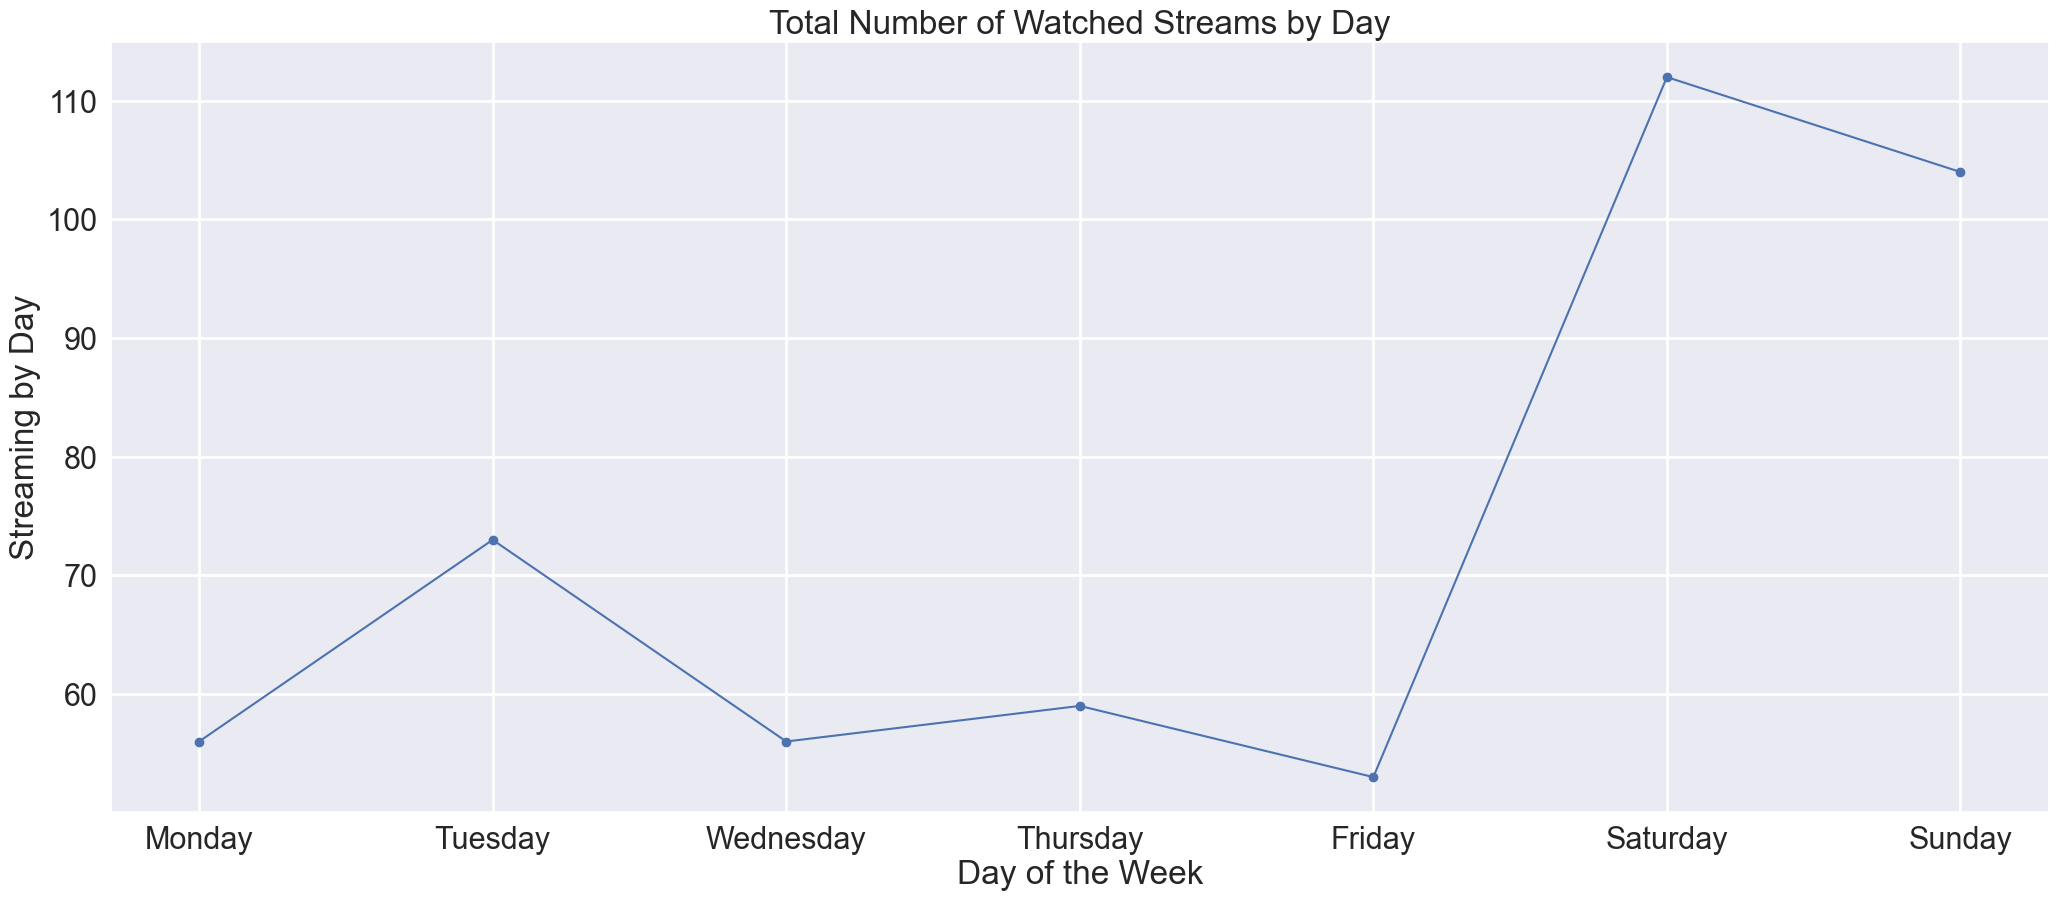

<Figure size 640x480 with 0 Axes>

In [983]:
# Create Plot
plt.figure(figsize=(25, 10))
sns.set_context('notebook', font_scale = 2, rc = {"grid.linewidth":2}) 

plt.plot(watched_per_day, marker="o")

days_of_the_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.ylabel('Streaming by Day')
plt.xlabel('Day of the Week')
plt.xticks(ticks = range(7), labels=days_of_the_week)
plt.title('Total Number of Watched Streams by Day')

plt.show()
plt.clf()

### **Q4. What hour of the day has the most watched streams?**
9 pm is the time of day with the most watched streams

In [984]:
# Create new "Hour Watched" column
data_combined["Hour Watched"] = data_combined["Date Watched"].dt.hour

# Check to see if new "Hour Watched" column is displaying correctly
data_combined.head()

,Date Watched,Title,Streaming Service,Type,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Day Watched,Hour Watched
0,2022-10-19 15:51:00-04:00,Dark Shadows,Hulu,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,2,15.0
1,2012-10-27 17:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,5,17.0
2,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,5,23.0
3,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,5,23.0
4,2012-11-04 00:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,6,0.0


In [985]:
# Set hours
data_combined['Hour Watched'] = pd.Categorical(data_combined['Hour Watched'], categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

In [986]:
# Create watched_per_hour and sort by "Hour Watched" using sort_index function so the hours are in order
watched_per_hour = data_combined['Hour Watched'].value_counts().sort_index()

watched_per_hour

0     16
1      1
2      3
3      0
4      0
5      0
6     28
7     28
8     19
9     18
10    25
11    33
12    31
13    18
14    21
15    20
16    23
17    27
18    34
19    17
20    34
21    61
22    35
23    21
Name: Hour Watched, dtype: int64

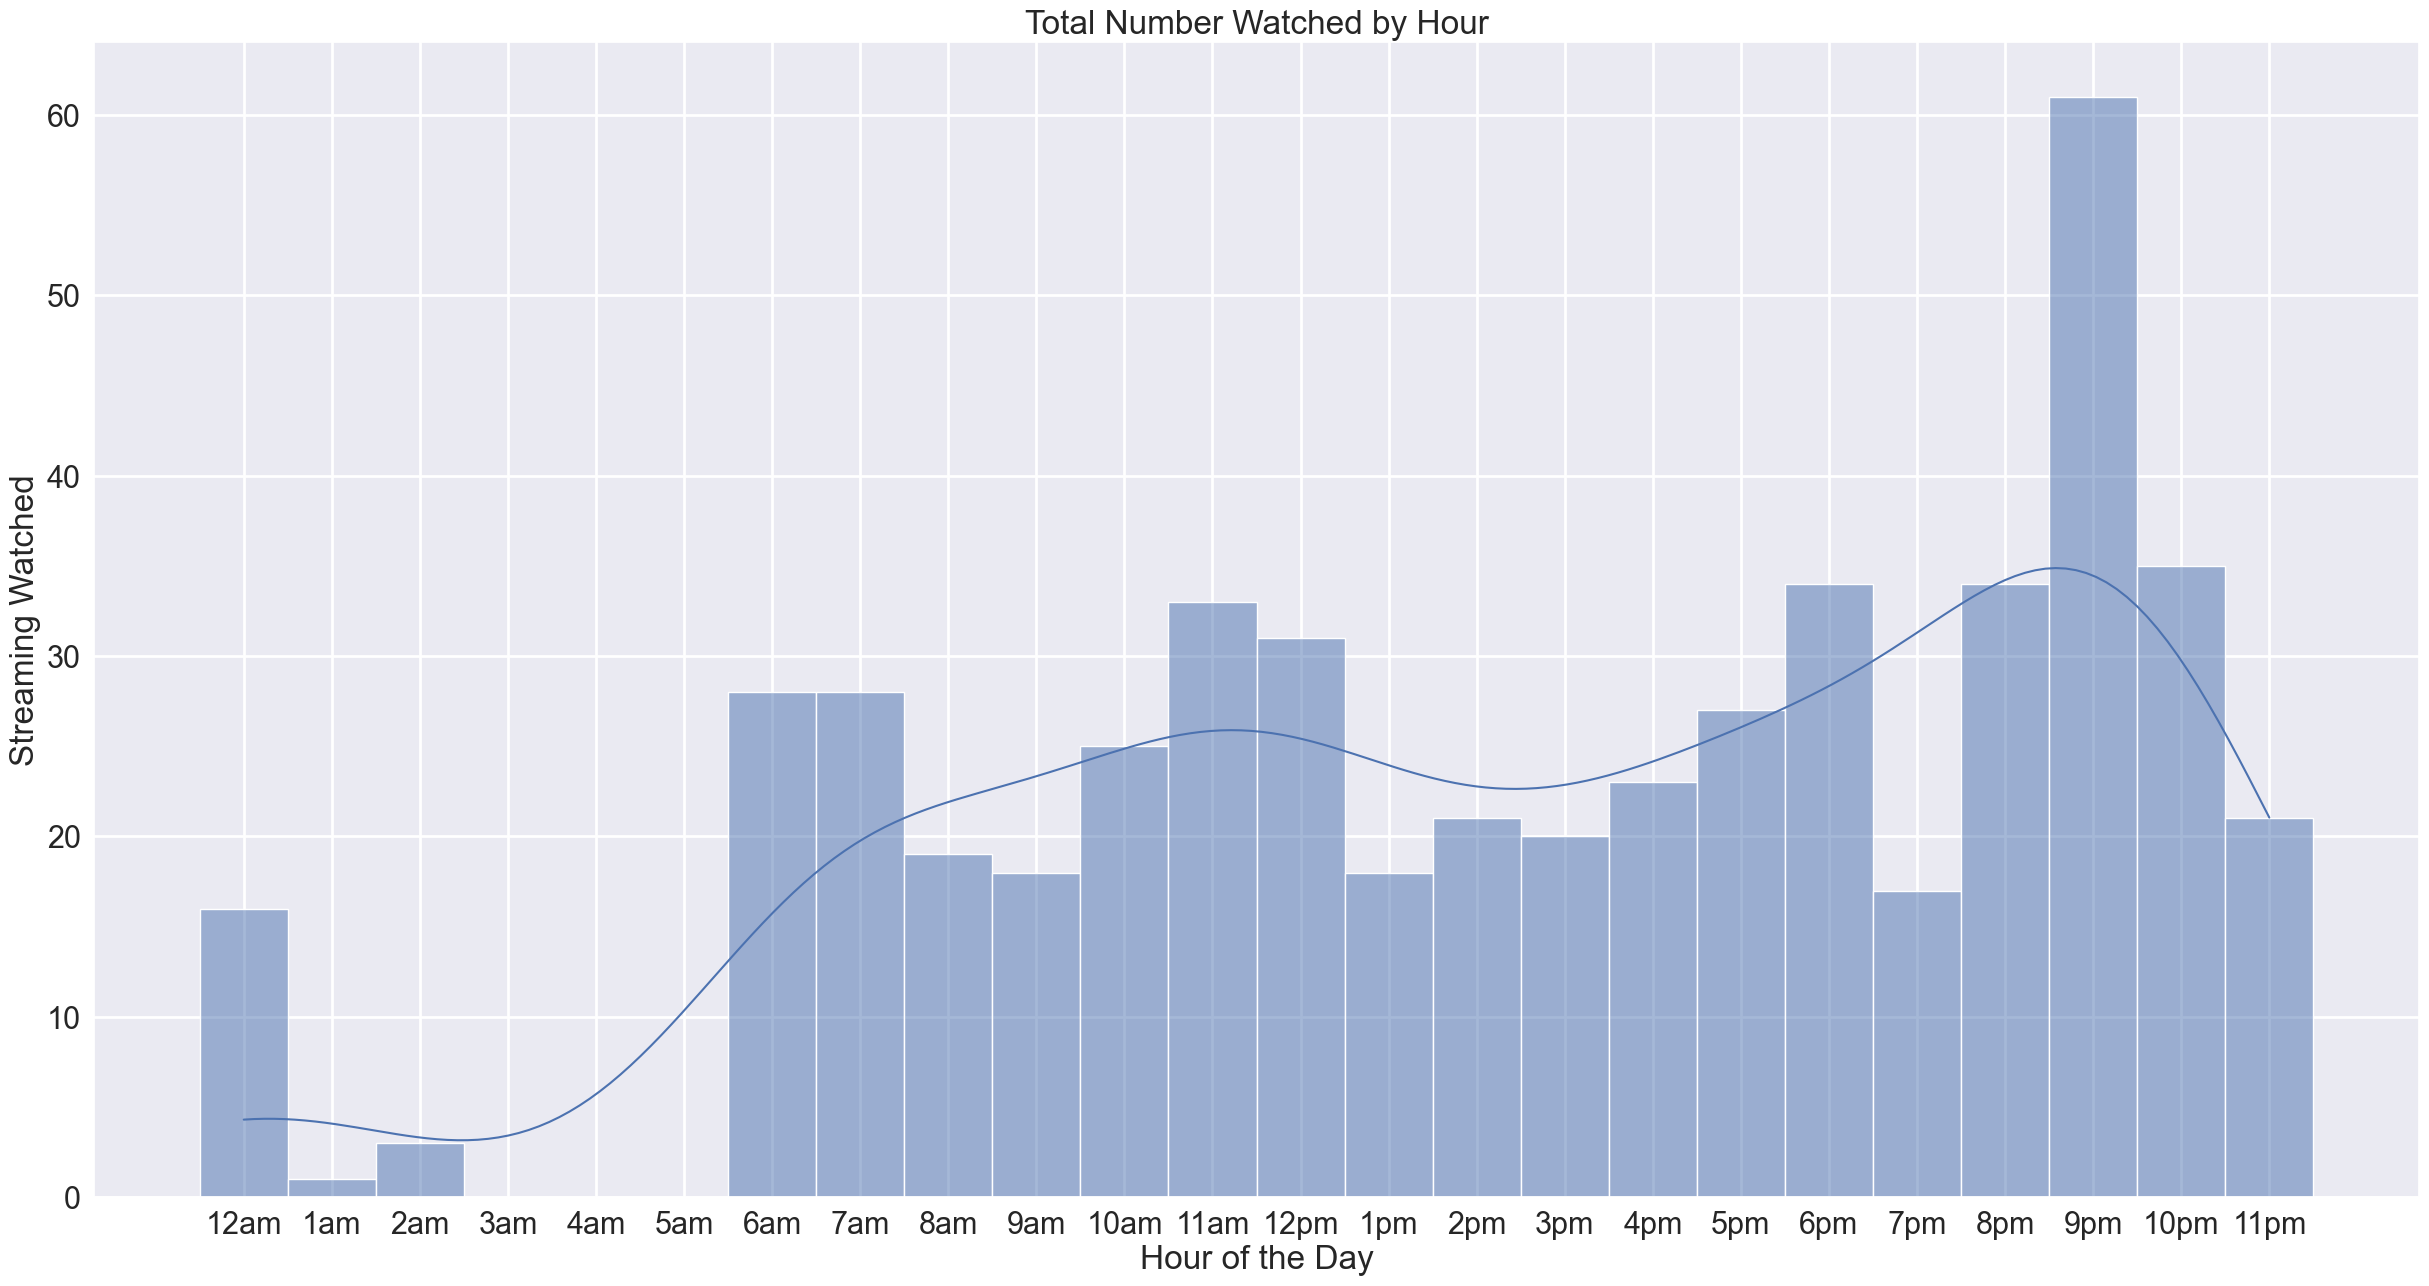

<Figure size 640x480 with 0 Axes>

In [987]:
sns.set_style('darkgrid')
plt.figure(figsize=(30, 15))
sns.set_context('notebook', font_scale = 2, rc = {"grid.linewidth":2}) 

sns.histplot(data_combined["Hour Watched"], kde=True)

hours_per_day = ["12am", "1am", "2am","3am", "4am", "5am", "6am", "7am", "8am", "9am", "10am", "11am", "12pm", "1pm", "2pm", "3pm", "4pm", "5pm", "6pm", "7pm", "8pm", "9pm", "10pm", "11pm"]
plt.ylabel('Streaming Watched')
plt.xlabel('Hour of the Day')
plt.xticks(ticks = range(24), labels=hours_per_day)
plt.title('Total Number Watched by Hour')

plt.show()
plt.clf()

### **Q5. Which genre of streaming video is the most watched?**
Comedy is by far the most watched streaming video genre.

In [988]:
# View top genres in combined dataframe
top_genres = data_combined.Genres.value_counts()

top_genres.head()

['comedy']                     90
['documentation']              37
['romance', 'comedy']          35
['comedy', 'documentation']    35
['comedy', 'romance']          20
Name: Genres, dtype: int64

I decided to use the following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity to split the "Genre" entries so each entry only showed one genre. The tradeoff is that I lost some nuance for the individual titles but overall felt this gave me the best representation for genres watched.

In [989]:
# Parse genre column
genres = {}

def get_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()
    parsed[i] = parsed[i][1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return row

data_combined.Genres = data_combined.Genres.map(get_genres)
genres

{'comedy': 326,
 'fantasy': 76,
 'horror': 11,
 'drama': 182,
 'romance': 147,
 'scifi': 28,
 'action': 38,
 'family': 80,
 'animation': 53,
 'music': 34,
 'reality': 0,
 'history': 6,
 'european': 6,
 'crime': 56,
 'documentation': 127,
 'thriller': 39,
 'sport': 22,
 'western': 2}

In [990]:
# Following code from https://www.kaggle.com/code/advaypatil/netflix-movies-and-popularity

def transform_genres(row):
  parsed = (str(row)[1:-1]).split(",")

  for i in range(len(parsed)):
    parsed[i] = parsed[i].strip()[1:-1]

  for i in parsed:
    if i not in genres.keys():
      genres[i] = 0
      continue
    genres[i] += 1

  return parsed[0] if parsed[0] != '' else 'none'

In [991]:
# Create the new "Genre" column 
data_combined["Genre"] = data_combined.Genres.map(transform_genres)
data_combined.Genre.value_counts()

comedy           204
drama             71
documentation     70
romance           63
animation         28
crime             25
scifi             13
family             9
music              9
fantasy            8
action             7
thriller           6
western            3
horror             3
history            1
Name: Genre, dtype: int64

In [992]:
# Change "documentation" to "doc" abbreviation
data_combined.Genre.replace(to_replace="documentation", value="doc", inplace=True)

In [993]:
# Check to see that new "Genre" column displays correctly
data_combined.head()

,Date Watched,Title,Streaming Service,Type,Release Year,Runtime,Genres,Imdb Score,Month Watched,Year Watched,Day Watched,Hour Watched,Genre
0,2022-10-19 15:51:00-04:00,Dark Shadows,Hulu,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2022.0,2,15,comedy
1,2012-10-27 17:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,October,2012.0,5,17,comedy
2,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,5,23,comedy
3,2012-11-03 23:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,5,23,comedy
4,2012-11-04 00:00:00-04:00,Dark Shadows,Prime Video,MOVIE,2012,113,"['comedy', 'fantasy', 'horror']",6.2,November,2012.0,6,0,comedy


<AxesSubplot:xlabel='Genre', ylabel='Count'>

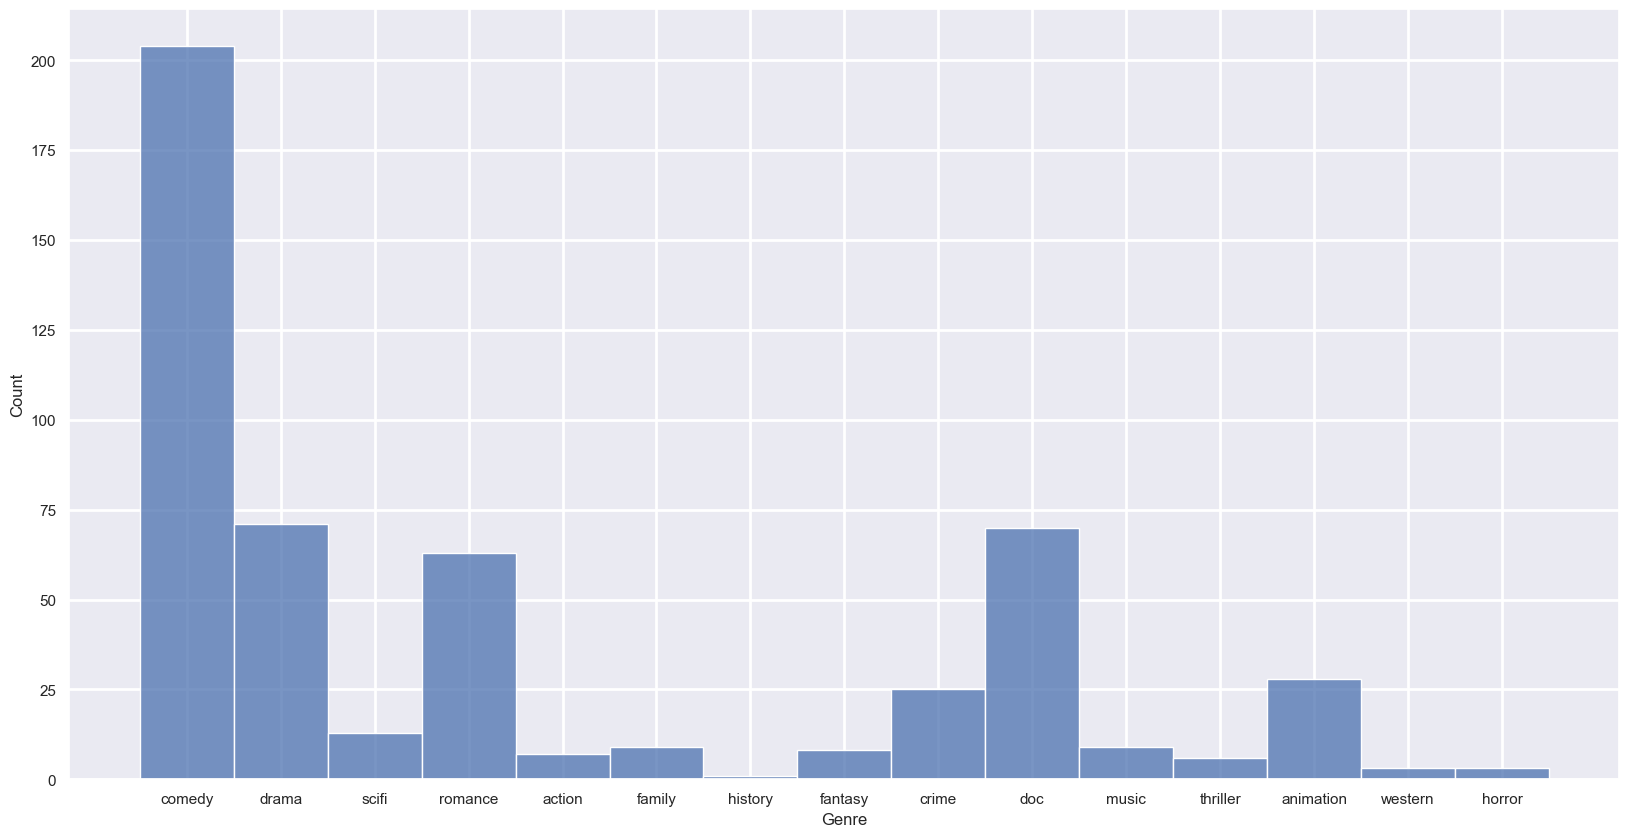

In [994]:
# Create histogram showing Genre by count
sns.set_style('darkgrid')
sns.set_context('notebook', font_scale = 1, rc = {"grid.linewidth":2}) 
plt.figure(figsize=(20,10))
sns.histplot(data_combined.Genre)

### **Show a Regplot to visualize the streaming video by "Date Watched" and which "Hour Watched**

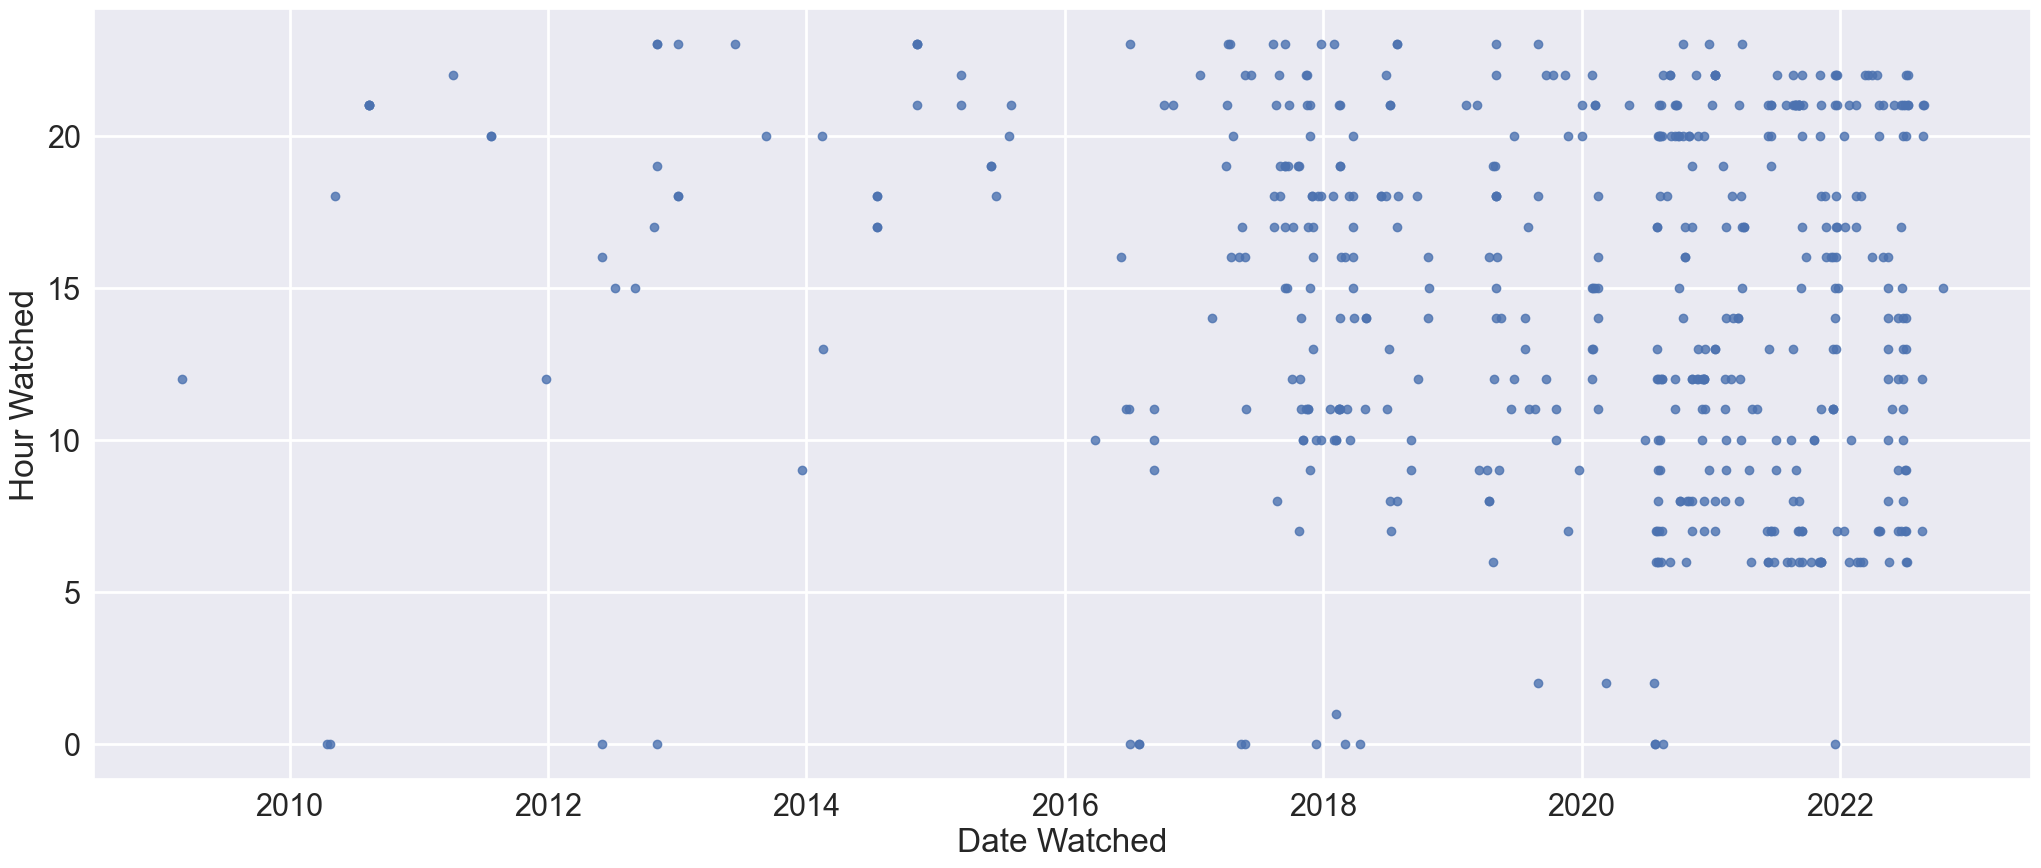

In [995]:
# Create a Regplot to show all the watch instances by "Date Watched"
sns.set_style('darkgrid')
plt.figure(figsize=(25, 10))
sns.set_context('notebook', font_scale = 2, rc = {"grid.linewidth":2})

# sns.regplot(x = "Day Watched", y = "Hour Watched", data=data_combined)
ax = sns.regplot(x= data_combined["Date Watched"], y= data_combined["Hour Watched"], fit_reg=False)
plt.show()